In [ ]:
### Project Main Code File
### ICMF 324 - Mahidol University International College
### Logan Harris, Jannis Thiemann, [Everyone Enter Their Name Here]

Source: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025

QS Documentation: https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings

# Variables

2025_Rank: QS World University Rankings in 2025.

2024_Rank: QS World University Rankings in 2024.

Institution_Name: Name of the institution.

Location: 2-letter country code (ISO 3166-1 alpha-2).

Location_Full: Full country name.

Size: Student body size category based on FTE; XL (>30,000), L (>=12,000), M (>=5,000), S (<5,000)

Academic_Reputation: Composite score (0-100) from a global academic survey of experts that weighs domestic and international nominations over five years

Employer Reputation: Composite score (0–100) derived from global employer surveys that combine international and domestic weighted counts over five years

Faculty Student: Ratio of full-time equivalent (FTE) academic staff to FTE students, indicating the academic resource availability per student

Citations per Faculty: Average citation count per faculty member, adjusted for paper-type exclusions, self-citations, and faculty area normalization, based on a six-year citation window from Scopus

International Faculty: Proportion of international faculty staff (determined by citizenship) among overall faculty staff

International Students: Proportion of international students (foreign nationals studying for at least three months) among the overall student body

International Research Network: Composite measure of the diversity and strength of sustained international research partnerships, normalized across faculty areas using joint publication data.

Employment Outcomes: Composite measure of an institution's success in producing highly employable graduates and impactful alumni

Sustainability: Composite measure of an institution's commitment to environmental, social, and governance initiatives—including campus projects, diversity, and SDG-focused research

QS Overall Score: Composite score combining the weighted indicators across lenses (Research and Discovery, Employability and Outcomes, Global Engagement, Learning Experience, and Sustainability)

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pycountry
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# load data
df = pd.read_csv('qs-world-rankings-2025.csv', encoding='UTF-8-SIG')

df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


# Data Cleaning and Feature Engineering

In [3]:
# Drop the redundant columns and assign to df1
df1 = df.drop(columns=["QS Overall Score", "Location Full", "2025 Rank", "2024 Rank"])

# Create a mapping dictionary for renaming the indicators
rename_dict = {
    "Academic Reputation": "AR",
    "Citations per Faculty": "CPF",
    "Employer Reputation": "ER",
    "Employment Outcomes": "EO",
    "International Faculty": "IFR",
    "International Research Network": "IRN",
    "International Students": "ISR",
    "Faculty Student": "FSR",
    "Sustainability": "SUS",
    "Institution Name": "Name"
}

# Rename the columns in df1
df1 = df1.rename(columns=rename_dict)

# Display the first few rows of df1 to verify the changes
df1.head()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
0,Massachusetts Institute of Technology (MIT),US,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0
1,Imperial College London,UK,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7
2,University of Oxford,UK,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0
3,Harvard University,US,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4
4,University of Cambridge,UK,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8


In [4]:
df1.tail()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
1498,University of Montana Missoula,US,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0
1499,University of Oradea,RO,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3
1500,University of San Carlos,PH,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0
1501,"University Politehnica of Timisoara, UPT",RO,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1
1502,Western Washington University,US,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1


In [8]:
df1.shape

(1503, 12)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1503 non-null   object 
 1   Location  1503 non-null   object 
 2   Size      1503 non-null   object 
 3   AR        1503 non-null   float64
 4   ER        1503 non-null   float64
 5   FSR       1503 non-null   float64
 6   CPF       1503 non-null   float64
 7   IFR       1403 non-null   float64
 8   ISR       1445 non-null   float64
 9   IRN       1502 non-null   float64
 10  EO        1503 non-null   float64
 11  SUS       1484 non-null   float64
dtypes: float64(9), object(3)
memory usage: 141.0+ KB


# Missing Value Analysis

In [29]:
missing_counts = df1.isnull().sum()
missing_percent = (df1.isnull().sum() / len(df)) * 100
print("Missing values percentage per column:\n", missing_percent)

Missing values percentage per column:
 Name        0.000000
Location    0.000000
Size        0.000000
AR          0.000000
ER          0.000000
FSR         0.000000
CPF         0.000000
IFR         6.653360
ISR         3.858949
IRN         0.066534
EO          0.000000
SUS         1.264138
dtype: float64


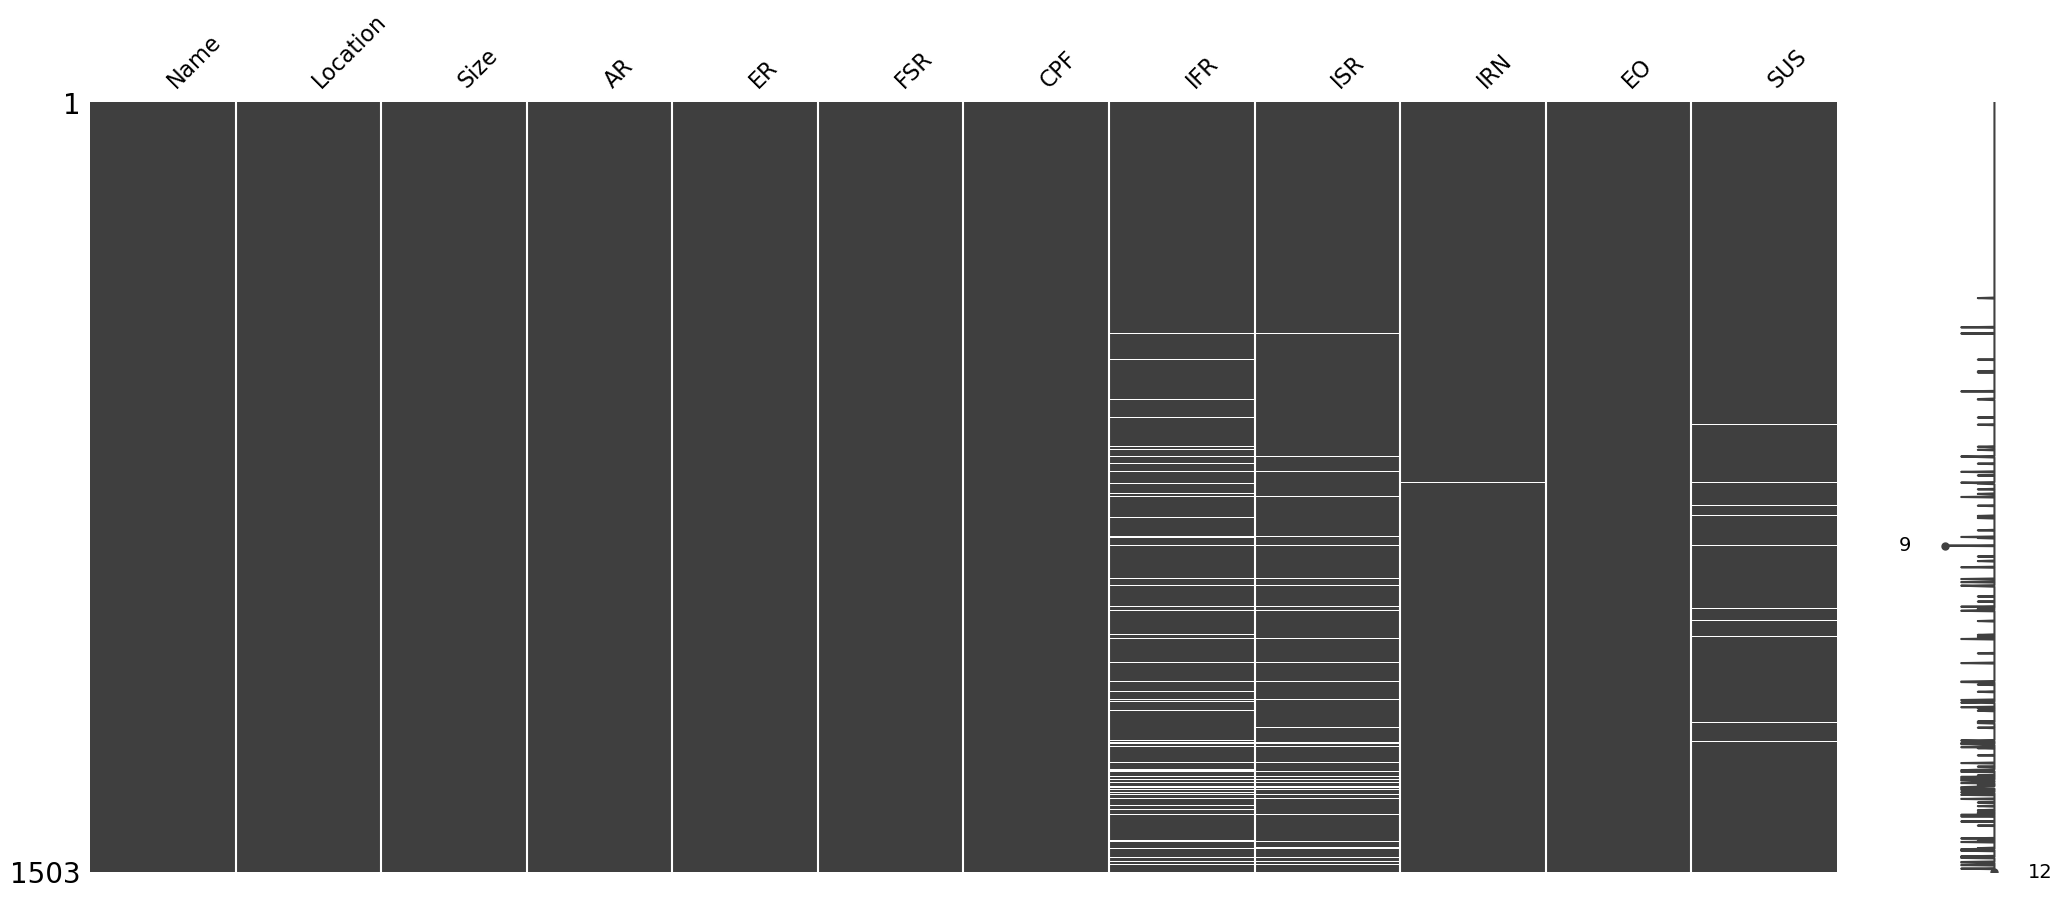

In [31]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data matrix
msno.matrix(df1)
plt.savefig("missing_data_matrix.pdf", dpi=1200, bbox_inches='tight')
plt.show()

In [33]:
columns_to_impute = ['IFR', 'ISR', 'IRN', 'SUS']

# Impute with median
df1[columns_to_impute] = df1[columns_to_impute].fillna(df1[columns_to_impute].median())

missing_counts = df1.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Name        0
Location    0
Size        0
AR          0
ER          0
FSR         0
CPF         0
IFR         0
ISR         0
IRN         0
EO          0
SUS         0
dtype: int64


In [35]:
df1.describe().round(2)

,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
count,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00
mean,20.29,19.79,28.13,23.50,29.51,24.96,50.13,23.83,24.09
std,22.33,23.78,27.61,27.87,33.48,30.65,29.86,27.35,30.94
min,1.30,1.10,1.00,1.00,1.00,1.00,1.00,1.20,1.00
25%,6.30,4.30,7.30,2.80,4.60,3.10,22.75,4.00,1.30
50%,11.00,9.40,16.00,9.90,12.50,9.60,51.10,11.80,6.75
75%,23.50,25.30,40.40,36.40,46.55,36.95,77.10,33.40,39.50
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [37]:
df1.describe(include='object')

,Name,Location,Size
count,1503,1503,1503
unique,1503,106,4
top,Massachusetts Institute of Technology (MIT),US,L
freq,1,197,691


In [ ]:
# Define the size order from smallest to largest
size_order = ['S', 'M', 'L', 'XL']

# Convert to ordered category and encode as integers
df1['SZ'] = df1['Size'].astype(
    pd.CategoricalDtype(categories=size_order, ordered=True)
).cat.codes

In [41]:
df['Location'].value_counts()

Location
US     197
UK      90
CN      71
JP      49
DE      48
      ... 
NCY      1
IS       1
CY       1
LU       1
HN       1
Name: count, Length: 106, dtype: int64

In [43]:
# Define the size order from smallest to largest
size_order = ['S', 'M', 'L', 'XL']

# Convert to ordered category and encode as integers
df1['SZ'] = df1['Size'].astype(
    pd.CategoricalDtype(categories=size_order, ordered=True)
).cat.codes

In [49]:
# Step 1: Count country frequencies
country_counts = df1['Location'].value_counts(normalize=True).cumsum()

print(country_counts)

# Step 2: Choose countries that cover 80% of the data
top_countries = country_counts[country_counts <= 0.8].index.tolist()

len(top_countries)

Location
US     0.131071
UK     0.190951
CN     0.238190
JP     0.270792
DE     0.302728
         ...   
NCY    0.997339
IS     0.998004
CY     0.998669
LU     0.999335
HN     1.000000
Name: proportion, Length: 106, dtype: float64


33

In [51]:
# --- Load World Bank classification ---
wb = pd.read_excel('CLASS.xlsx', sheet_name='List of economies')
wb = wb[['Code', 'Income group']]  # 'Code' is ISO-3

# --- Fallback mapping for non-standard ISO-2 codes ---
iso2_fallbacks = {
    'UK': 'GB',     # United Kingdom
    'XK': 'XKX',    # Kosovo
    'TW': 'TWN',    # Taiwan
    'NCY': None,    # Northern Cyprus (no ISO-3, will patch manually)
    'VE': 'VEN',    # Venezuela
}

# --- Function to map ISO-2 → ISO-3, using fallback if needed ---
def iso2_to_iso3(code):
    if code in iso2_fallbacks:
        return iso2_fallbacks[code]
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# --- Apply mapping ---
df1['ISO3'] = df1['Location'].apply(iso2_to_iso3)

# --- Merge World Bank income levels ---
df1 = df1.merge(wb, how='left', left_on='ISO3', right_on='Code')
df1 = df1.rename(columns={'Income group': 'Income_Level'}).drop(columns=['Code'])

# --- Manual mapping for countries still missing ---
manual_income_map = {
    'UK': 'High income',
    'NCY': 'Upper middle income',   # Northern Cyprus (estimated)
    'VE': 'Upper middle income'     # Venezuela (2023)
}

df1['Income_Level'] = df1.apply(
    lambda row: manual_income_map.get(row['Location'], row['Income_Level']),
    axis=1
)

# --- Final check ---
print(df1['Income_Level'].value_counts(dropna=False))

Income_Level
High income            966
Upper middle income    391
Lower middle income    142
Low income               4
Name: count, dtype: int64


In [55]:
# Define the income level order
income_order = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]

# Convert to ordered categorical and encode as integers (0–3)
df1['IL'] = df1['Income_Level'].astype(
    pd.CategoricalDtype(categories=income_order, ordered=True)
).cat.codes

# Log 

In [ ]:
# List of features to log-transform
features_to_log = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Log-transform and add to df1 as new columns
for col in features_to_log:
    df1[f'log_{col}'] = np.log1p(df1[col])

# Visualizations

In [ ]:
# 3x3 matrix of KDE + histogram plots
columns_to_plot = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Create the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to make indexing easy

# Loop through each variable and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (in case fewer than 9 variables)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Institutions by size
df1['Size'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Institution Size Distribution')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count institutions per 2-letter country code
top_countries = df1['Location'].value_counts().head(25)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh', color='cornflowerblue')

plt.xlabel('Number of Institutions')
plt.ylabel('Country')
plt.title('Top 15 Countries by Number of Institutions')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Count institutions per 2-letter code
country_counts = df1['Location'].value_counts().reset_index()
country_counts.columns = ['Country_Code', 'Institution_Count']

# Step 2: Convert ISO-2 to ISO-3
def to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None  # skip invalid codes

country_counts['ISO3'] = country_counts['Country_Code'].apply(to_iso3)
country_counts = country_counts.dropna(subset=['ISO3'])  # Drop unknowns

# Step 3: Choropleth
fig = px.choropleth(
    country_counts,
    locations='ISO3',
    color='Institution_Count',
    color_continuous_scale='viridis',
    locationmode='ISO-3',
    title='Number of Institutions by Country'#
)

# Resize the map window
fig.update_layout(
    width=1000,   # Increase width
    height=500    # Increase height
)

fig.update_geos(
    projection_type='natural earth',
    showcoastlines=True,
    showcountries=True
)
fig.show()

In [ ]:
# Select only numeric columns from df1
numeric_df = df1.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap with annotations (formatted to 2 decimal places)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Add title and display the plot
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
# Get upper triangle of the correlation matrix (excluding self-correlations)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten into long format
all_corr = corr_pairs.stack().reset_index()
all_corr.columns = ['v1', 'v2', 'corr']

# Round correlation values
all_corr['corr'] = all_corr['corr'].round(4)

# Sort by absolute correlation strength (descending)
all_corr_sorted = all_corr.reindex(all_corr['corr'].abs().sort_values(ascending=False).index)

# Display top results
print(all_corr_sorted)

In [ ]:
# Plot log-transformed variables from df1
columns_to_plot = [f'log_{col}' for col in features_to_log]

# Create the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each variable and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Clean up any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Location
US     0.131071
UK     0.190951
CN     0.238190
JP     0.270792
DE     0.302728
         ...   
NCY    0.997339
IS     0.998004
CY     0.998669
LU     0.999335
HN     1.000000
Name: proportion, Length: 106, dtype: float64


33

In [ ]:
# Define the shared feature base (excluding EO and ER)
base_features = ['log_AR', 'log_FSR', 'log_CPF', 'log_IFR', 'log_ISR', 'log_IRN', 'log_SUS', 'IL', 'SZ']

# Add ER and EO as predictors in each other’s models
features_EO = base_features + ['log_ER']  # use ER to predict EO
features_ER = base_features + ['log_EO']  # use EO to predict ER

# Set test/train split (consistent across both models)
X = df1[sorted(list(set(features_EO + features_ER)))]  # union of all features
y_dummy = df1['log_EO']  # just a placeholder to split the dataset

# Do the split once and reuse indexes
X_train_all, X_test_all, idx_train, idx_test = train_test_split(
    X, df1.index, test_size=0.2, random_state=133
)

# Subset your data manually by the index
def get_X_y(df, target_var, features, train_idx, test_idx):
    X_train = df.loc[train_idx, features]
    X_test = df.loc[test_idx, features]
    y_train = df.loc[train_idx, target_var]
    y_test = df.loc[test_idx, target_var]
    return X_train, X_test, y_train, y_test

# Get train/test sets
X_train_EO, X_test_EO, y_train_EO, y_test_EO = get_X_y(df1, 'log_EO', features_EO, idx_train, idx_test)
X_train_ER, X_test_ER, y_train_ER, y_test_ER = get_X_y(df1, 'log_ER', features_ER, idx_train, idx_test)

In [ ]:
# 📌 Variable sort order
sorted_features = [
    'Intercept', 'IL', 'SZ',
    'log_AR', 'log_ER', 'log_FSR', 'log_CPF',
    'log_IFR', 'log_ISR', 'log_IRN', 'log_EO', 'log_SUS'
]

# ⭐ Significance stars
def get_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

# 🧠 Regression function with robust standard errors
def run_full_ols(name, X_train, X_test, y_train, y_test):
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train_const).fit(cov_type='HC1')  # 🔁 Robust SEs

    y_train_pred = model.predict(X_train_const)
    y_test_pred = model.predict(X_test_const)

    # Metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2_train = model.rsquared
    adj_r2_train = model.rsquared_adj
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    # Regression table
    reg_table = pd.DataFrame({
        'Variable': model.params.index,
        'Coeff': model.params.values,
        'Std_Error': model.bse.values,     # ✅ Robust SEs
        't': model.tvalues.values,
        'Sig': model.pvalues.values
    })

    reg_table['Variable'] = reg_table['Variable'].replace({'const': 'Intercept'})
    reg_table['Sig'] = reg_table['Sig'].round(4)
    reg_table['Coeff'] = reg_table['Coeff'].round(4)
    reg_table['Std_Error'] = reg_table['Std_Error'].round(4)
    reg_table['t'] = reg_table['t'].round(2)
    reg_table['Stars'] = reg_table['Sig'].apply(get_stars)

    # Sort by custom order
    reg_table['SortKey'] = reg_table['Variable'].apply(
        lambda x: sorted_features.index(x) if x in sorted_features else 999
    )
    reg_table = reg_table.sort_values(by='SortKey').drop(columns='SortKey')

    # Metrics summary
    perf = {
        'Model': name,
        'MAE_Train': round(mae_train, 4),
        'MAE_Test': round(mae_test, 4),
        'MSE_Train': round(mse_train, 4),
        'MSE_Test': round(mse_test, 4),
        'RMSE_Train': round(rmse_train, 4),
        'RMSE_Test': round(rmse_test, 4),
        'Adj_R2_Train': round(adj_r2_train, 4),
        'Adj_R2_Test': round(adj_r2_test, 4)
    }

    return reg_table, perf

# ▶️ Run both models
table_eo, perf_eo = run_full_ols("EO", X_train_EO, X_test_EO, y_train_EO, y_test_EO)
table_er, perf_er = run_full_ols("ER", X_train_ER, X_test_ER, y_train_ER, y_test_ER)

# 📈 Performance summary table
perf_df = pd.DataFrame([perf_eo, perf_er])

# ✅ Print final outputs
print("📊 EO Regression Table:\n")
print(table_eo[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📊 ER Regression Table:\n")
print(table_er[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📈 Model Performance Summary:\n")
print(perf_df)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Function to run Lasso regression with consistent output format
def run_lasso_like_ols(name, X_train, X_test, y_train, y_test, alpha=0.01):
    pipeline = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=10000))
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Extract model and coefficients
    lasso_model = pipeline.named_steps['lasso']
    coefs = pd.Series(lasso_model.coef_, index=X_train.columns).round(4)
    intercept = round(lasso_model.intercept_, 4)

    # Build table in same format as OLS
    reg_table = pd.DataFrame({
        'Variable': ['Intercept'] + list(coefs.index),
        'Coeff': [intercept] + list(coefs.values),
        'Std_Error': ['-'] * (len(coefs) + 1),
        't': ['-'] * (len(coefs) + 1),
        'Sig': ['-'] * (len(coefs) + 1),
        'Stars': ['-'] * (len(coefs) + 1)
    })

    # Sort by defined variable order
    reg_table['SortKey'] = reg_table['Variable'].apply(
        lambda x: sorted_features.index(x) if x in sorted_features else 999
    )
    reg_table = reg_table.sort_values(by='SortKey').drop(columns='SortKey')

    # Performance metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    perf = {
        'Model': f"Lasso_{name}",
        'MAE_Train': round(mae_train, 4),
        'MAE_Test': round(mae_test, 4),
        'MSE_Train': round(mse_train, 4),
        'MSE_Test': round(mse_test, 4),
        'RMSE_Train': round(rmse_train, 4),
        'RMSE_Test': round(rmse_test, 4),
        'Adj_R2_Train': '-',
        'Adj_R2_Test': '-'
    }

    return reg_table, perf

# ▶️ Run Lasso for both EO and ER
lasso_table_eo, lasso_perf_eo = run_lasso_like_ols("EO", X_train_EO, X_test_EO, y_train_EO, y_test_EO)
lasso_table_er, lasso_perf_er = run_lasso_like_ols("ER", X_train_ER, X_test_ER, y_train_ER, y_test_ER)

# 📈 Append to performance summary
perf_df = pd.concat([perf_df, pd.DataFrame([lasso_perf_eo, lasso_perf_er])], ignore_index=True)

# ✅ Print Lasso results
print("\n📊 Lasso EO Regression Table:\n")
print(lasso_table_eo[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📊 Lasso ER Regression Table:\n")
print(lasso_table_er[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📈 Updated Model Performance Summary:\n")
print(perf_df)

In [ ]:
eo_selected_vars = ['IL', 'SZ', 'log_AR', 'log_ER', 'log_FSR', 'log_IFR', 'log_ISR', 'log_IRN', 'log_SUS']
er_selected_vars = ['IL', 'SZ', 'log_AR', 'log_CPF', 'log_ISR', 'log_IRN', 'log_EO', 'log_SUS']

# 🔁 OLS on reduced features from Lasso output
# Replace: X_train_EO, X_test_EO, ... with reduced columns only
X_train_EO_reduced = X_train_EO[eo_selected_vars]
X_test_EO_reduced = X_test_EO[eo_selected_vars]
X_train_ER_reduced = X_train_ER[er_selected_vars]
X_test_ER_reduced = X_test_ER[er_selected_vars]

# ▶️ Run both reduced models
table_eo_reduced, perf_eo_reduced = run_full_ols("EO_Reduced", X_train_EO_reduced, X_test_EO_reduced, y_train_EO, y_test_EO)
table_er_reduced, perf_er_reduced = run_full_ols("ER_Reduced", X_train_ER_reduced, X_test_ER_reduced, y_train_ER, y_test_ER)

# 📈 Append to performance summary
perf_df = pd.concat([perf_df, pd.DataFrame([perf_eo_reduced, perf_er_reduced])], ignore_index=True)

# ✅ Print Reduced Model Outputs
print("\n📊 EO (Reduced) Regression Table:\n")
print(table_eo_reduced[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📊 ER (Reduced) Regression Table:\n")
print(table_er_reduced[['Variable', 'Coeff', 'Std_Error', 't', 'Sig', 'Stars']])

print("\n📈 Updated Model Performance Summary (incl. Reduced Models):\n")
print(perf_df)

# Robustness

In [ ]:
# Full models (if you haven't already stored them)
model_eo = sm.OLS(y_train_EO, sm.add_constant(X_train_EO)).fit()
model_er = sm.OLS(y_train_ER, sm.add_constant(X_train_ER)).fit()

# Reduced models
model_eo_reduced = sm.OLS(y_train_EO, sm.add_constant(X_train_EO_reduced)).fit()
model_er_reduced = sm.OLS(y_train_ER, sm.add_constant(X_train_ER_reduced)).fit()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

models = {
    "EO": model_eo,
    "ER": model_er,
    "EO_Reduced": model_eo_reduced,
    "ER_Reduced": model_er_reduced
}

for name, model in models.items():
    X = model.model.exog
    features = model.model.exog_names
    vif_df = pd.DataFrame({
        'Variable': features,
        'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    })
    print(f"\n📊 VIF for {name}")
    print(vif_df)

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

for name, model in models.items():
    lm_stat, lm_pval, f_stat, f_pval = het_breuschpagan(model.resid, model.model.exog)
    print(f"\n Breusch-Pagan Test for {name}")
    print(f"LM stat: {lm_stat:.4f}, p-value: {lm_pval:.4f} | F stat: {f_stat:.4f}, p-value: {f_pval:.4f}")

In [ ]:
from statsmodels.stats.stattools import durbin_watson

for name, model in models.items():
    dw = durbin_watson(model.resid)
    print(f"\n🔁 Durbin-Watson for {name}: {dw:.4f}")

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

model_dict = {
    "EO": model_eo,
    "ER": model_er,
    "EO_Reduced": model_eo_reduced,
    "ER_Reduced": model_er_reduced
}

# QQ Plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(model_dict.items()):
    qqplot(model.resid, line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot - {name}')

plt.tight_layout()
plt.suptitle("QQ Plots – Normality of Residuals", fontsize=16, y=1.03)
plt.show()

# K-Fold

In [ ]:
def cross_val_ols_all_metrics(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    rmse_scores = []
    mae_scores = []
    mse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        model = sm.OLS(y_train, X_train_const).fit(cov_type='HC1')
        y_pred = model.predict(X_test_const)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    return {
        "RMSE_Mean": round(np.mean(rmse_scores), 4),
        "RMSE_Std": round(np.std(rmse_scores), 4),
        "MAE_Mean": round(np.mean(mae_scores), 4),
        "MAE_Std": round(np.std(mae_scores), 4),
        "MSE_Mean": round(np.mean(mse_scores), 4),
        "MSE_Std": round(np.std(mse_scores), 4)
    }

# Run CV for all 4 models
cv_summary = []

cv_summary.append({"Model": "EO (Full)", **cross_val_ols_all_metrics(X_train_EO, y_train_EO)})
cv_summary.append({"Model": "ER (Full)", **cross_val_ols_all_metrics(X_train_ER, y_train_ER)})
cv_summary.append({"Model": "EO (Reduced)", **cross_val_ols_all_metrics(X_train_EO_reduced, y_train_EO)})
cv_summary.append({"Model": "ER (Reduced)", **cross_val_ols_all_metrics(X_train_ER_reduced, y_train_ER)})

# Convert to DataFrame and display
cv_df = pd.DataFrame(cv_summary)
print("\n📊 5-Fold Cross-Validation Results (RMSE, MAE, MSE):")
print(cv_df)